In [1]:
import os
import sys
sys.path.append("./..")
from utils import PROJECT_ROOT
from definitions import get_cell_color
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pickle

In [5]:
iteration = 2
PhenoGraph_k =  100

In [21]:
template_patient_id = 882
template_image_id = 50

In [13]:
def get_pos(G):
    x = nx.get_node_attributes(G, "X")
    y = nx.get_node_attributes(G, "Y")
    pos = {}
    for key, _ in x.items():
        pos[key] = (x[key], y[key])
    return pos

### Template_patient

In [10]:
cells_ = pd.read_csv(
    os.path.join(PROJECT_ROOT, "Input", "Single-cell", "Danenberg",
    "patient_{}_image_{}.csv".format(template_patient_id, template_image_id))
)
Adj = np.load(
    os.path.join(PROJECT_ROOT, "Output", "a_Cellular_graph", "Danenberg", "Cohort_1",
    "patient_{}_image_{}".format(template_patient_id, template_image_id),
    "Adj.npy")
)
print(f"{len(cells_)} cells in image {template_image_id} of patient {template_patient_id}")

2118 cells in image 50 of patient 882


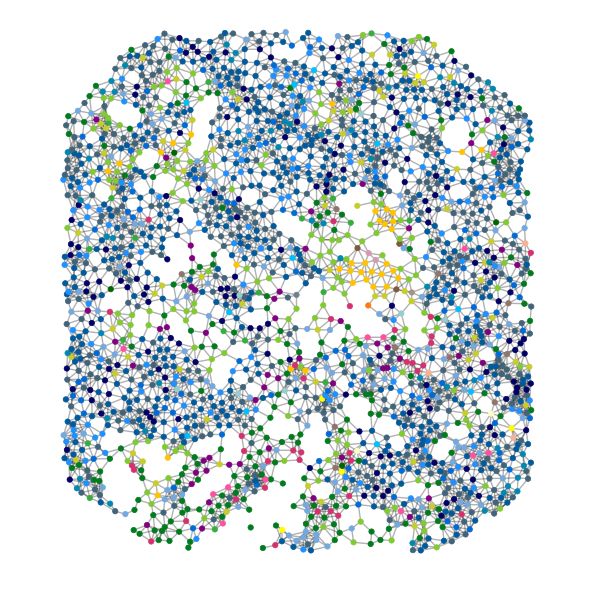

In [13]:
Adj[Adj < 0.01] = 0
np.fill_diagonal(Adj, 0)
G = nx.from_numpy_array(Adj)
nx.set_node_attributes(G, cells_["X"], "X")
nx.set_node_attributes(G, cells_["Y"], "Y")
nx.set_node_attributes(G, cells_["cell_type"], "cell_type")
f, ax = plt.subplots(
        1,
        1,
        figsize=(6, 6),
        tight_layout=True,
    )
cell_color_dict = get_cell_color('Danenberg')
nx.draw_networkx_nodes(
        G,
        get_pos(G),
        node_size=15,
        node_color=[cell_color_dict[cell_type] for cell_type in list(nx.get_node_attributes(G, "cell_type").values())],
        linewidths=0.5,
        ax=ax,
    )
nx.draw_networkx_edges(G, get_pos(G), ax=ax, alpha=0.3, width = 1)
ax.set(
        xlim=(
            (max(cells_["X"]) - min(cells_["X"])) / 2
            - 350 ,
            (max(cells_["X"]) - min(cells_["X"])) / 2
            + 350,
        ),
        ylim=(
            (max(cells_["Y"]) - min(cells_["Y"])) / 2
            - 350 ,
            (max(cells_["Y"]) - min(cells_["Y"])) / 2
            + 350,
        ),
    )
ax.set_axis_off()


### Representative patients

In [6]:
SoftWL_dict= pickle.load(
    open(
        os.path.join(
            PROJECT_ROOT,
            "Output",
            "b_Soft_WL_Kernel",
            "Danenberg",
            "Cohort_1",
            "SoftWL_dict_iter_"
            + str(iteration)
            + "_PhenoGraph_k_"
            + str(PhenoGraph_k)
            + ".pkl",
        ),
        "rb",
    ),
)
Patient_ids = SoftWL_dict["Patient_id"]
Gram_matrix = SoftWL_dict["Gram_matrix"]
Histograms = SoftWL_dict["Histogram"]

In [20]:
Representative_patient_ids = [262, 356, 290]
template_patient_index = np.where(np.array(Patient_ids) == template_patient_id)[0][0]
Representative_patient_indices = [np.where(np.array(Patient_ids) == patient_id)[0][0] for patient_id in Representative_patient_ids]

Similarities_sorted = np.sort(Gram_matrix[template_patient_index, :])[::-1]
Patient_indices_sorted = np.argsort(Gram_matrix[template_patient_index, :])[::-1]
Representative_patient_rankings = [list(Patient_indices_sorted).index(i) for i in Representative_patient_indices]


for i in range(0, len(Representative_patient_ids)):
    print(f"patient {Representative_patient_ids[i]} is ranked {Representative_patient_rankings[i]}th most similar to patient {Similarities_sorted[Representative_patient_rankings[i]]}, with a similarity")

patient 262 is ranked 1th most similar to patient 0.9837329199661071, with a similarity
patient 356 is ranked 20th most similar to patient 0.7947941499427679, with a similarity
patient 290 is ranked 96th most similar to patient 0.13230856893562667, with a similarity


1652 cells in image 145 of patient 262


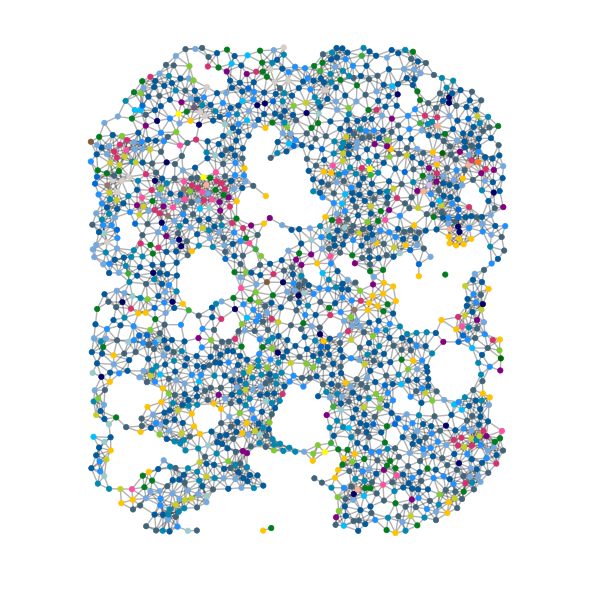

In [14]:
patient_id = 262
image_id = 145
cells_ = pd.read_csv(
    os.path.join(PROJECT_ROOT, "Input", "Single-cell", "Danenberg",
    "patient_{}_image_{}.csv".format(patient_id, image_id))
)
Adj = np.load(

    os.path.join(PROJECT_ROOT, "Output", "a_Cellular_graph", "Danenberg", "Cohort_1",
    "patient_{}_image_{}".format(patient_id, image_id),
    "Adj.npy")
)
print(f"{len(cells_)} cells in image {image_id} of patient {patient_id}")
Adj[Adj < 0.01] = 0
np.fill_diagonal(Adj, 0)
G = nx.from_numpy_array(Adj)
nx.set_node_attributes(G, cells_["X"], "X")
nx.set_node_attributes(G, cells_["Y"], "Y")
nx.set_node_attributes(G, cells_["cell_type"], "cell_type")
f, ax = plt.subplots(
        1,
        1,
        figsize=(6, 6),
        tight_layout=True,
    )
cell_color_dict = get_cell_color('Danenberg')
nx.draw_networkx_nodes(
        G,
        get_pos(G),
        node_size=15,
        node_color=[cell_color_dict[cell_type] for cell_type in list(nx.get_node_attributes(G, "cell_type").values())],
        linewidths=0.5,
        ax=ax,
    )
nx.draw_networkx_edges(G, get_pos(G), ax=ax, alpha=0.3, width = 1)
ax.set(
        xlim=(
            (max(cells_["X"]) - min(cells_["X"])) / 2
            - 350 ,
            (max(cells_["X"]) - min(cells_["X"])) / 2
            + 350,
        ),
        ylim=(
            (max(cells_["Y"]) - min(cells_["Y"])) / 2
            - 350 ,
            (max(cells_["Y"]) - min(cells_["Y"])) / 2
            + 350,
        ),
    )
ax.set_axis_off()

1244 cells in image 41 of patient 356


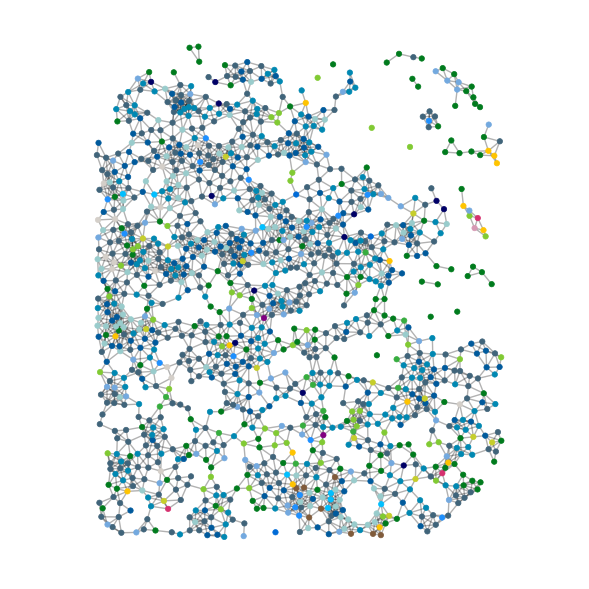

In [17]:
patient_id = 356
image_id = 41
cells_ = pd.read_csv(
    os.path.join(PROJECT_ROOT, "Input", "Single-cell", "Danenberg",
    "patient_{}_image_{}.csv".format(patient_id, image_id))
)
Adj = np.load(

    os.path.join(PROJECT_ROOT, "Output", "a_Cellular_graph", "Danenberg", "Cohort_1",
    "patient_{}_image_{}".format(patient_id, image_id),
    "Adj.npy")
)
print(f"{len(cells_)} cells in image {image_id} of patient {patient_id}")
Adj[Adj < 0.01] = 0
np.fill_diagonal(Adj, 0)
G = nx.from_numpy_array(Adj)
nx.set_node_attributes(G, cells_["X"], "X")
nx.set_node_attributes(G, cells_["Y"], "Y")
nx.set_node_attributes(G, cells_["cell_type"], "cell_type")
f, ax = plt.subplots(
        1,
        1,
        figsize=(6, 6),
        tight_layout=True,
    )
cell_color_dict = get_cell_color('Danenberg')
nx.draw_networkx_nodes(
        G,
        get_pos(G),
        node_size=15,
        node_color=[cell_color_dict[cell_type] for cell_type in list(nx.get_node_attributes(G, "cell_type").values())],
        linewidths=0.5,
        ax=ax,
    )
nx.draw_networkx_edges(G, get_pos(G), ax=ax, alpha=0.3, width = 1)
ax.set(
        xlim=(
            (max(cells_["X"]) - min(cells_["X"])) / 2
            - 350 ,
            (max(cells_["X"]) - min(cells_["X"])) / 2
            + 350,
        ),
        ylim=(
            (max(cells_["Y"]) - min(cells_["Y"])) / 2
            - 350 ,
            (max(cells_["Y"]) - min(cells_["Y"])) / 2
            + 350,
        ),
    )
ax.set_axis_off()

1348 cells in image 199 of patient 290


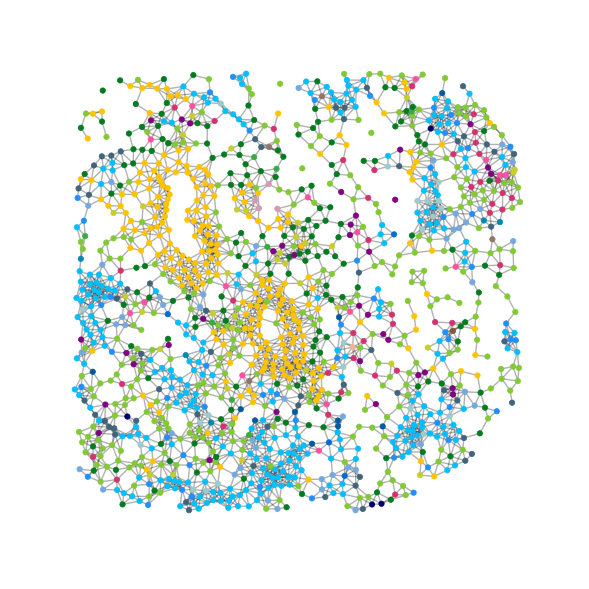

In [18]:
patient_id = 290 
image_id = 199
cells_ = pd.read_csv(
    os.path.join(PROJECT_ROOT, "Input", "Single-cell", "Danenberg",
    "patient_{}_image_{}.csv".format(patient_id, image_id))
)
Adj = np.load(

    os.path.join(PROJECT_ROOT, "Output", "a_Cellular_graph", "Danenberg", "Cohort_1",
    "patient_{}_image_{}".format(patient_id, image_id),
    "Adj.npy")
)
print(f"{len(cells_)} cells in image {image_id} of patient {patient_id}")
Adj[Adj < 0.01] = 0
np.fill_diagonal(Adj, 0)
G = nx.from_numpy_array(Adj)
nx.set_node_attributes(G, cells_["X"], "X")
nx.set_node_attributes(G, cells_["Y"], "Y")
nx.set_node_attributes(G, cells_["cell_type"], "cell_type")
f, ax = plt.subplots(
        1,
        1,
        figsize=(6, 6),
        tight_layout=True,
    )
cell_color_dict = get_cell_color('Danenberg')
nx.draw_networkx_nodes(
        G,
        get_pos(G),
        node_size=15,
        node_color=[cell_color_dict[cell_type] for cell_type in list(nx.get_node_attributes(G, "cell_type").values())],
        linewidths=0.5,
        ax=ax,
    )
nx.draw_networkx_edges(G, get_pos(G), ax=ax, alpha=0.3, width = 1)
ax.set(
        xlim=(
            (max(cells_["X"]) - min(cells_["X"])) / 2
            - 350 ,
            (max(cells_["X"]) - min(cells_["X"])) / 2
            + 350,
        ),
        ylim=(
            (max(cells_["Y"]) - min(cells_["Y"])) / 2
            - 350 ,
            (max(cells_["Y"]) - min(cells_["Y"])) / 2
            + 350,
        ),
    )
ax.set_axis_off()